<a href="https://colab.research.google.com/github/ali-talebi/project_industrial/blob/main/detect_defect_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creator : Ali Talebi 
Email : Alitalebishahroodi@gmail.com
## Project : Detect Defect on Object [ Classification problem ( 2 classes ) ] with Deep learning ( CNN + MLP ] 

### Resource of Data set is : Kaggle Website 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/Master Courses /Term2/project/archive (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: cas

In [121]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import time 
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense  , Dropout , BatchNormalization , Conv2D , Flatten , MaxPool2D 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers.legacy import Adam , SGD 
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import plot_model 
from keras.applications.vgg19 import VGG19 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score , confusion_matrix  , ConfusionMatrixDisplay  
import seaborn as sns 

In [5]:
Total_img = []
Total_label = []

In [6]:
for i in os.listdir("/content/casting_data/casting_data/train")  : 
     
  for index , j  in enumerate(os.listdir(f"/content/casting_data/casting_data/train/{i}")) :
    
    img = cv2.imread(f"/content/casting_data/casting_data/train/{i}/{j}" , 1 )
    img = cv2.resize(img , (224 , 224) )
    Total_img.append(img)
    Total_label.append(i)

    if index > 500 :
      break 

     

  print(index , i ) 





501 def_front
501 ok_front


In [7]:
len(Total_img)

1004

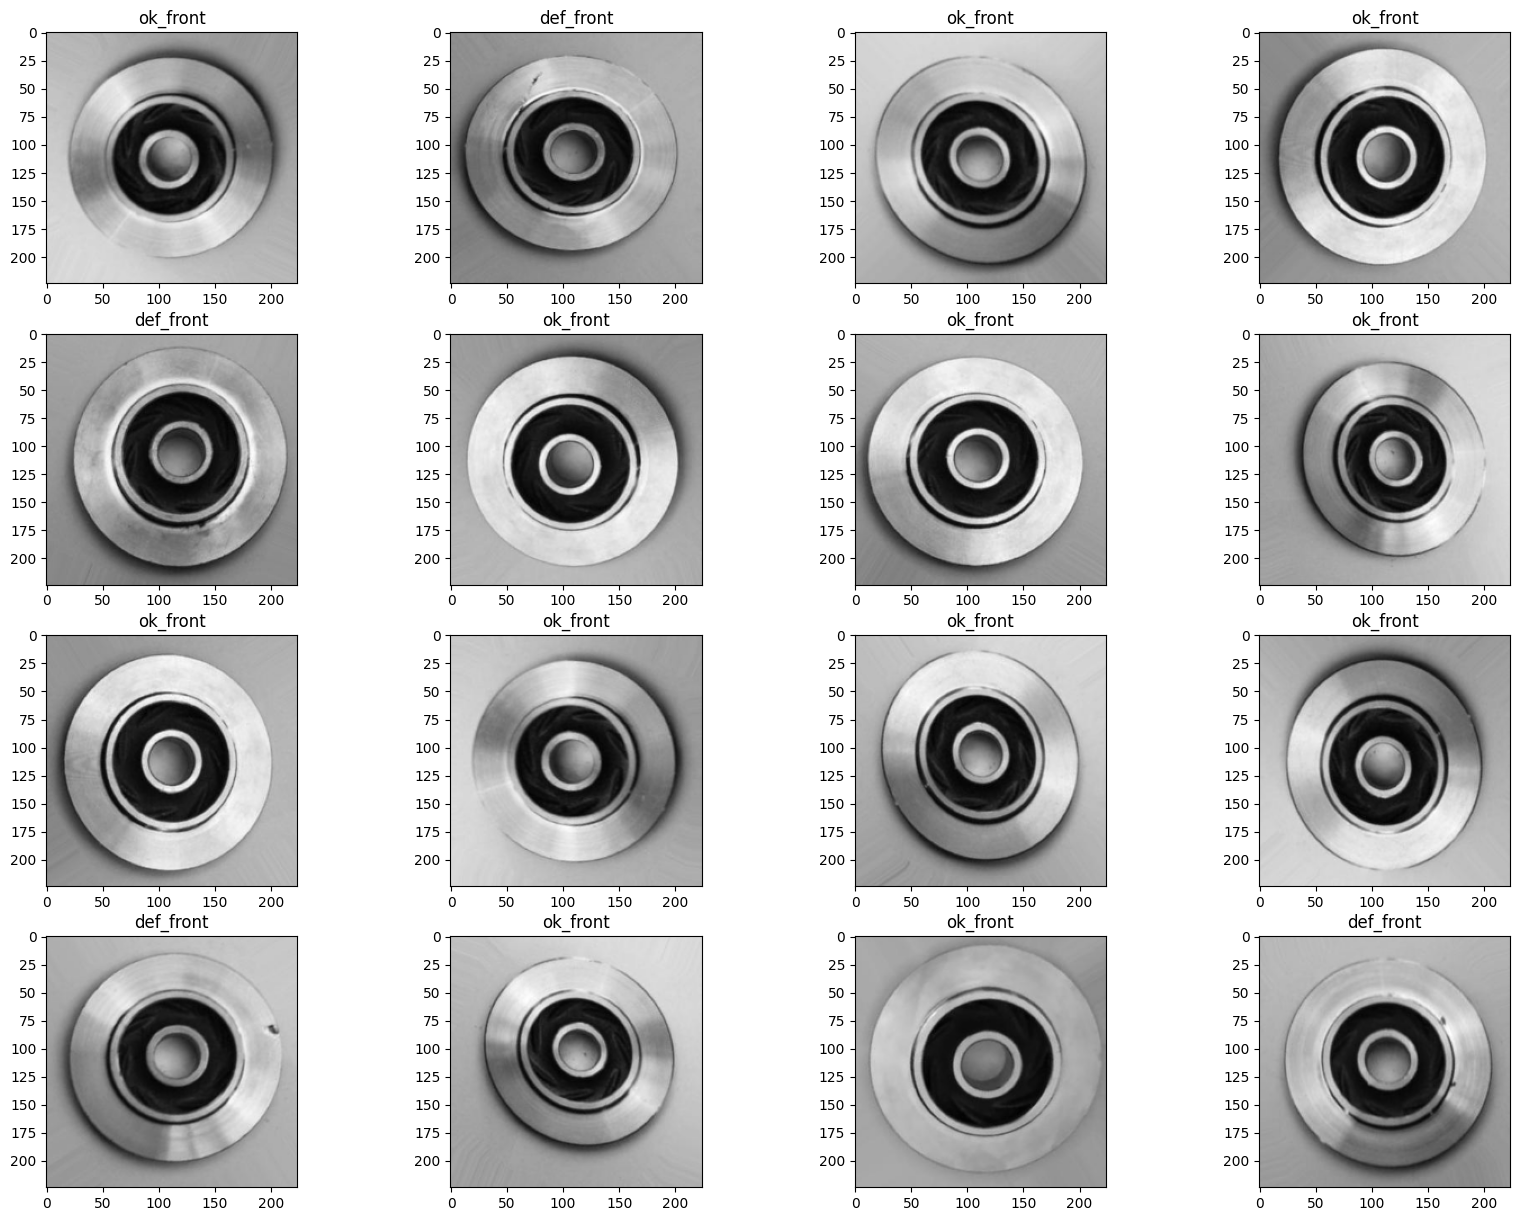

In [8]:
r2 = []
plt.figure(figsize = (20 , 15 ) )
for index , i in enumerate(np.random.randint(1 , 1004 , size = 16 )) : 
  r2.append(Total_img[i])
  ax = plt.subplot(4 , 4 , index + 1   )
  ax.imshow(Total_img[i])
  ax.set_title(Total_label[i])
  ax.set_xlabel("")

plt.show()

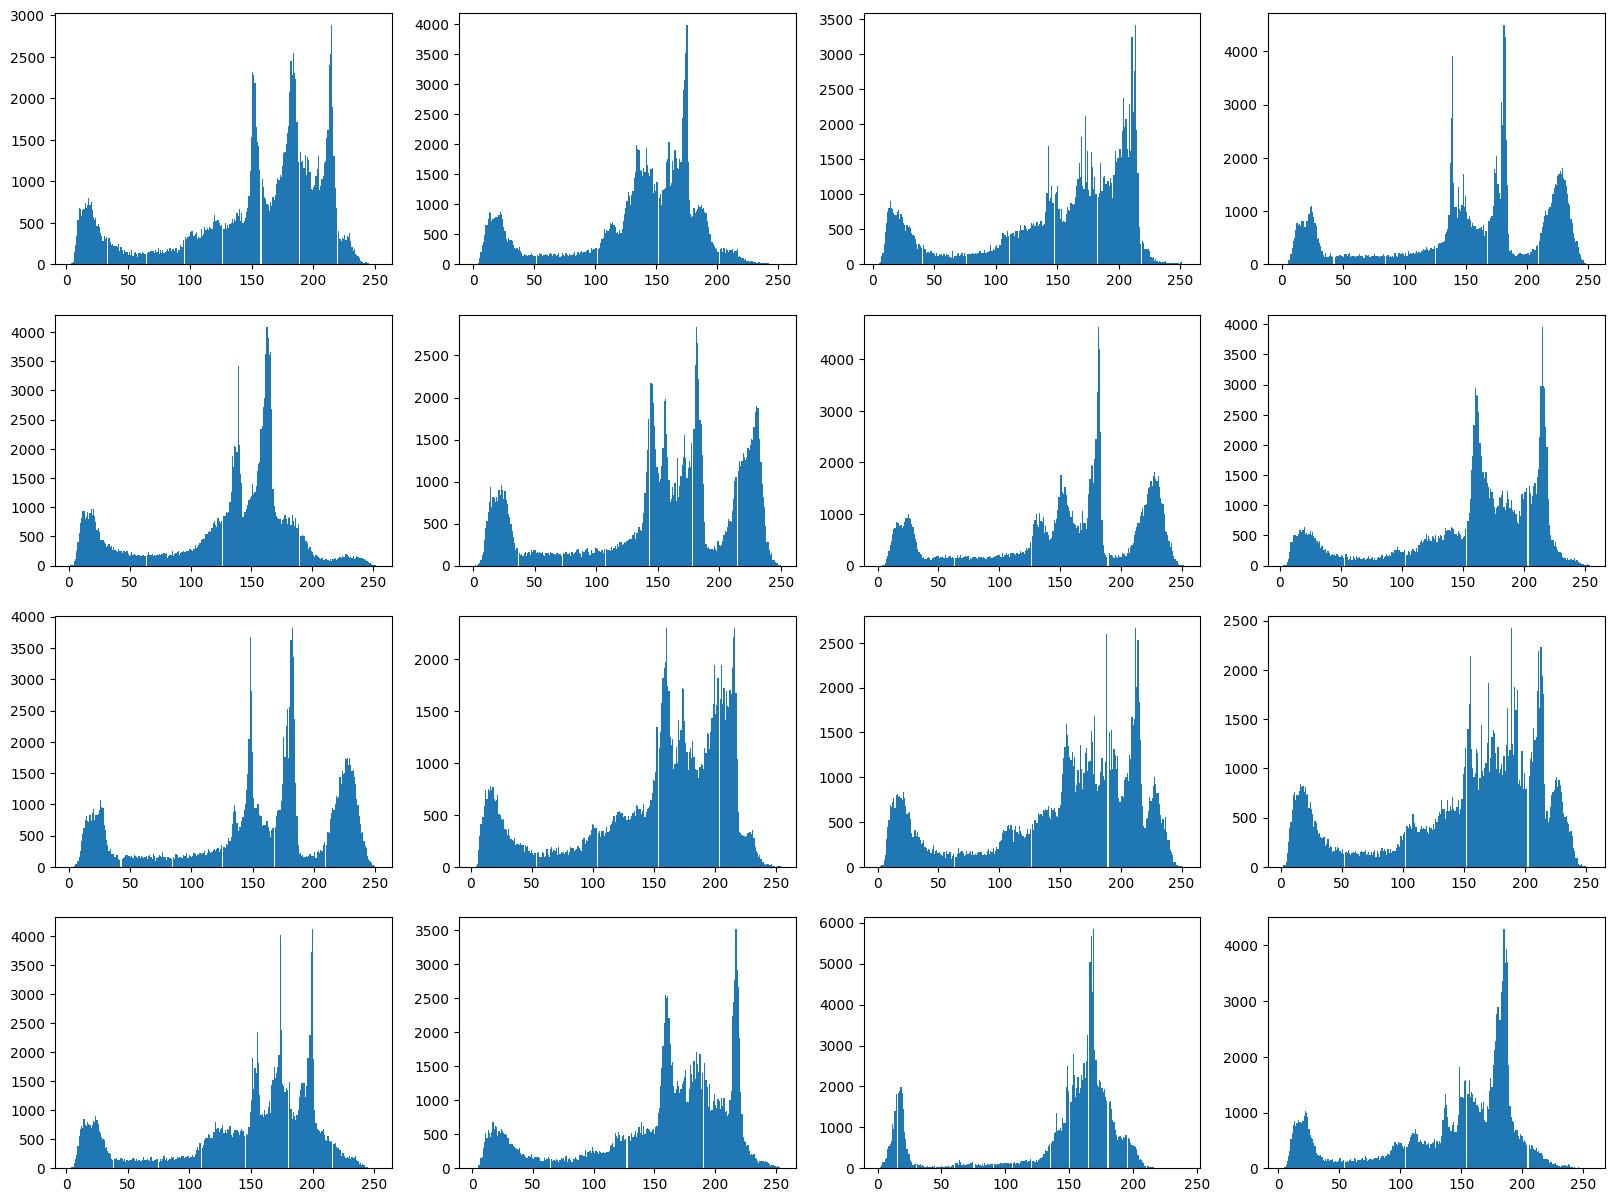

In [9]:
plt.figure(figsize = (20 , 15 ) )
for index , value in enumerate(r2) :
  ax = plt.subplot(4 , 4 , index +1  )  
  ax.hist(value.ravel() , 256 )
  ax.set_xlabel("")

plt.show()

In [10]:
len(Total_img)

1004

In [11]:
len(Total_label)

1004

In [12]:
Total_img = np.array(Total_img , dtype = "float" ) / 255.0 
Total_label = np.array(Total_label)

In [13]:
Total_img.shape 

(1004, 224, 224, 3)

In [14]:
Total_label.shape 

(1004,)

In [15]:
Total_label = Total_label.reshape(-1 , 1 ) 

In [16]:
Total_label.shape 

(1004, 1)

In [17]:
x_train , x_test , y_train , y_test = train_test_split(Total_img , Total_label , test_size = 0.2 , random_state = 42 , shuffle = True ) 

In [18]:
y_train

array([['def_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['ok_front'],
       ['ok_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['def_front'],
       ['def_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['ok_front'],
       ['def_front'],
       ['def_front'],
       ['def_front'],
       ['ok_front'],
       ['ok_front'],
       

In [19]:
Total_label

array([['def_front'],
       ['def_front'],
       ['def_front'],
       ...,
       ['ok_front'],
       ['ok_front'],
       ['ok_front']], dtype='<U9')

In [20]:
obj_label_coder = LabelEncoder()
y_train = obj_label_coder.fit_transform(y_train)
y_test = obj_label_coder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [21]:
y_train

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [22]:
y_train = y_train.reshape(-1 , 1 ) 
y_test  = y_test.reshape(-1 , 1 ) 


In [ ]:
#y_train = to_categorical(y_train , 2 ) 
#y_test  = to_categorical(y_test  , 2 ) 

In [23]:
My_model = Sequential([

    Conv2D(128 , (5 , 5 ) , activation = "relu" , input_shape = x_train.shape[1:] ) , 
    BatchNormalization() , 
    Conv2D(55 , (5, 5) , activation = "relu" ) , 
    BatchNormalization() , 
    MaxPool2D() , 


    
    Conv2D(40 , (3, 3) , activation = "relu" ) , 
    BatchNormalization() ,
    Conv2D(55 , (5, 5) , activation = "relu" ) , 
    BatchNormalization() , 
    MaxPool2D() , 



    Flatten() , 

    Dense(128 , activation = "relu" ) , 
    BatchNormalization() ,
    Dropout(0.2) , 
    Dense(50 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 


    Dense(10 , activation = "relu" ) , 
    
    Dense(1 ,  activation = "sigmoid"  ) , 

])

In [34]:
opti = Adam(learning_rate = 0.01 ,  decay = 0.1 / 50 ) 

In [35]:
My_model.compile(opti , loss = "binary_crossentropy" , metrics = ["acc"] ) 

In [36]:
My_model.input 

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_input')>

In [37]:
My_model.output 

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

In [38]:
ali = My_model.fit(x_train , y_train , epochs = 100  , batch_size = 50 , validation_split= 0.2    )

Epoch 1/100
13/13 [==============================] - 10s 677ms/step - loss: 0.0805 - acc: 0.9798 - val_loss: 0.2403 - val_acc: 0.9193
Epoch 2/100
13/13 [==============================] - 8s 655ms/step - loss: 0.0278 - acc: 0.9907 - val_loss: 0.4092 - val_acc: 0.8758
Epoch 3/100
13/13 [==============================] - 9s 681ms/step - loss: 0.0117 - acc: 0.9953 - val_loss: 0.7284 - val_acc: 0.8323
Epoch 4/100
13/13 [==============================] - 9s 684ms/step - loss: 0.0231 - acc: 0.9891 - val_loss: 0.1227 - val_acc: 0.9565
Epoch 5/100
13/13 [==============================] - 9s 685ms/step - loss: 0.0095 - acc: 0.9969 - val_loss: 0.1373 - val_acc: 0.9503
Epoch 6/100
13/13 [==============================] - 9s 675ms/step - loss: 0.0083 - acc: 0.9969 - val_loss: 0.1686 - val_acc: 0.9565
Epoch 7/100
13/13 [==============================] - 9s 669ms/step - loss: 0.0063 - acc: 0.9984 - val_loss: 0.2167 - val_acc: 0.9503
Epoch 8/100
13/13 [==============================] - 9s 667ms/step -

In [39]:
My_model.evaluate(x_test , y_test ) 

7/7 [==============================] - 5s 257ms/step - loss: 0.7695 - acc: 0.9652


[0.7694693803787231, 0.96517413854599]

In [40]:
My_model.save("96.h5")

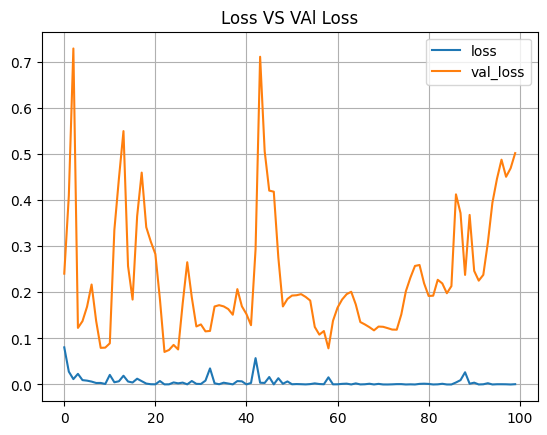

In [43]:
plt.plot(range(100) , ali.history["loss"] , label = "loss" ) 
plt.plot(range(100) , ali.history["val_loss"] , label = "val_loss" ) 
plt.title("Loss VS VAl Loss")
plt.legend()
plt.grid()
plt.show()


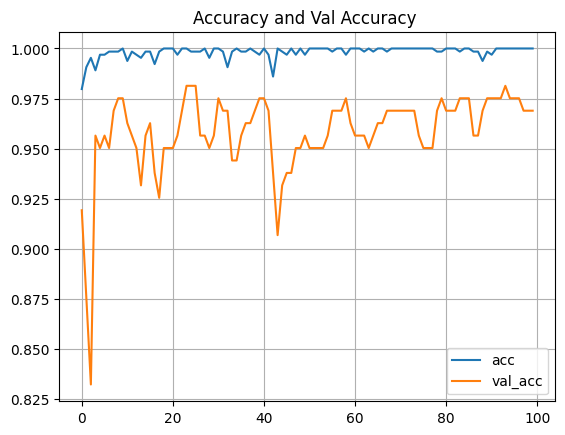

In [44]:
plt.plot(range(100) , ali.history["acc"] , label = "acc" ) 
plt.plot(range(100) , ali.history["val_acc"], label = "val_acc" ) 
plt.title("Accuracy and Val Accuracy ") 
plt.legend()
plt.grid()
plt.show()

In [122]:
y_predict = My_model.predict(x_test)

7/7 [==============================] - 1s 81ms/step


In [123]:
y_predict

array([[9.9999988e-01],
       [9.9999917e-01],
       [9.8768914e-01],
       [9.9979168e-01],
       [1.2592317e-10],
       [1.0000000e+00],
       [9.9998415e-01],
       [9.9999785e-01],
       [4.3865087e-17],
       [4.1250783e-20],
       [1.0000000e+00],
       [7.4624603e-20],
       [9.9999988e-01],
       [9.0286699e-15],
       [9.5048364e-22],
       [9.9999881e-01],
       [1.0000000e+00],
       [9.9998581e-01],
       [5.0624606e-23],
       [1.2377495e-23],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.1363448e-24],
       [3.3538989e-18],
       [9.9999821e-01],
       [6.3264117e-17],
       [9.7504059e-16],
       [9.9983037e-01],
       [1.3807956e-20],
       [1.0000000e+00],
       [9.9999976e-01],
       [1.0000000e+00],
       [8.1413054e-05],
       [1.7172678e-20],
       [1.0000000e+00],
       [7.4346750e-19],
       [9.9999988e-01],
       [3.3122578e-26],
       [1.7420642e-19],
       [6.4520056e-23],
       [1.5360722e-17],
       [9.999939

In [124]:
def set_value(vorodi) : 
  result = []

  for i in vorodi : 
    if i <0.5 : 
      result.append(0)

    else : 
      result.append(1)

  return result 

In [125]:
khoroji = set_value(y_predict) 

In [126]:
len(khoroji)

201

In [127]:
accuracy_score(khoroji , y_test )


0.9651741293532339

In [130]:
y_test.shape 

(201, 1)

In [128]:
confusion_matrix(khoroji , y_test )

array([[96,  2],
       [ 5, 98]])

In [99]:
khoroji[:2]

[1, 1]

In [100]:
y_test[:2]

array([[1],
       [1]])

In [131]:
khoroji = obj_label_coder.inverse_transform(khoroji) 

In [132]:
khoroji

array(['ok_front', 'ok_front', 'ok_front', 'ok_front', 'def_front',
       'ok_front', 'ok_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'def_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'ok_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'ok_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'def_front', 'ok_front', 'def_front', 'ok_front',
       'ok_front', 'ok_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'ok_front', 'def_front', 'def_front', 'def_front',
       'def_front', 'ok_front', 'def_front', 'ok_front', 'def_front',
       'def_front', 'def_front', 'ok_front', 'ok_front', 'ok_front',
       'ok_front', 'ok_front', 'def_front', 'ok_front', 'ok_front',
       'ok_front', 'def_front', 'def_front', 'def_front', 'def_front',
       'ok_front', 'def_front', 'def_front', 'ok_front', 'ok_front',
       'def_front', 'def_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'def_fr

In [133]:
y_test_original_decoder = obj_label_coder.inverse_transform(y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
y_test_original_decoder

array(['ok_front', 'ok_front', 'ok_front', 'ok_front', 'def_front',
       'ok_front', 'ok_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'def_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'ok_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'ok_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'def_front', 'def_front', 'def_front', 'ok_front',
       'ok_front', 'ok_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'ok_front', 'def_front', 'def_front', 'def_front',
       'def_front', 'ok_front', 'def_front', 'ok_front', 'def_front',
       'def_front', 'def_front', 'ok_front', 'ok_front', 'ok_front',
       'ok_front', 'ok_front', 'def_front', 'ok_front', 'ok_front',
       'ok_front', 'def_front', 'def_front', 'def_front', 'def_front',
       'ok_front', 'def_front', 'def_front', 'ok_front', 'ok_front',
       'def_front', 'def_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'def_f

In [135]:
khoroji

array(['ok_front', 'ok_front', 'ok_front', 'ok_front', 'def_front',
       'ok_front', 'ok_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'def_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'ok_front', 'ok_front', 'def_front', 'def_front',
       'ok_front', 'ok_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'def_front', 'ok_front', 'def_front', 'ok_front',
       'ok_front', 'ok_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'ok_front', 'def_front', 'def_front', 'def_front',
       'def_front', 'ok_front', 'def_front', 'ok_front', 'def_front',
       'def_front', 'def_front', 'ok_front', 'ok_front', 'ok_front',
       'ok_front', 'ok_front', 'def_front', 'ok_front', 'ok_front',
       'ok_front', 'def_front', 'def_front', 'def_front', 'def_front',
       'ok_front', 'def_front', 'def_front', 'ok_front', 'ok_front',
       'def_front', 'def_front', 'def_front', 'def_front', 'ok_front',
       'def_front', 'def_fr

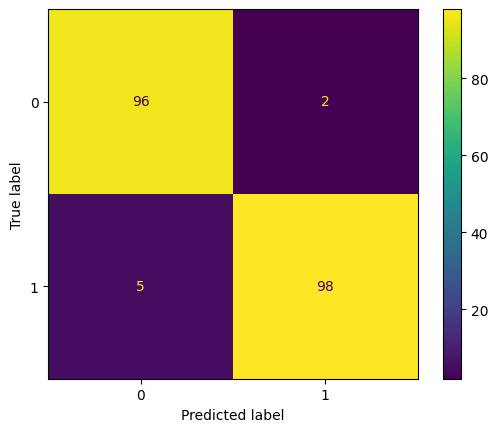

In [137]:
cm = ConfusionMatrixDisplay(confusion_matrix(  khoroji , y_test_original_decoder ))
cm.plot()

In [138]:
r = confusion_matrix(  khoroji , y_test_original_decoder )

[[96  2]
 [ 5 98]]
              precision    recall  f1-score   support

   def_front       0.95      0.98      0.96        98
    ok_front       0.98      0.95      0.97       103

    accuracy                           0.97       201
   macro avg       0.97      0.97      0.97       201
weighted avg       0.97      0.97      0.97       201



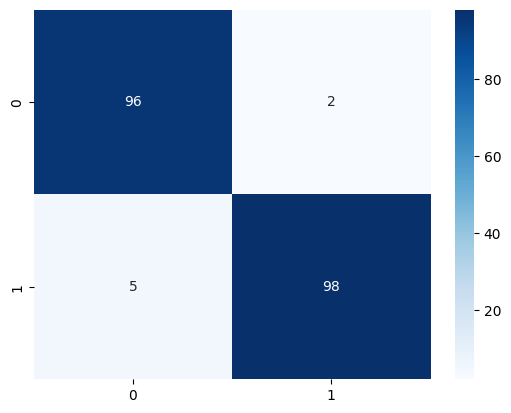

In [142]:
sns.heatmap(r , annot = True , cmap = "Blues") 
print(r)
print(classification_report(khoroji , y_test_original_decoder ))

In [117]:
print(classification_report(khoroji , y_test_original_decoder ))

              precision    recall  f1-score   support

   def_front       0.95      0.98      0.96        98
    ok_front       0.98      0.95      0.97       103

    accuracy                           0.97       201
   macro avg       0.97      0.97      0.97       201
weighted avg       0.97      0.97      0.97       201



In [81]:
obj = classification_report(khoroji , y_test_original_decoder )

In [82]:
sns.heatmap(obj)

ValueError: ignored

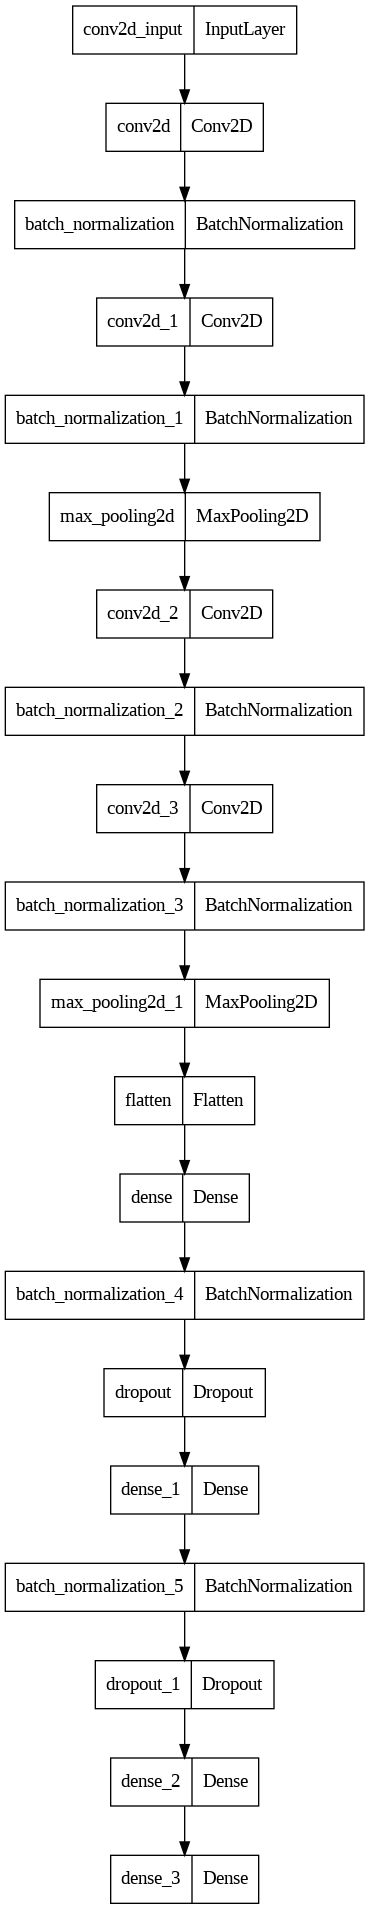

In [86]:
plot_model(My_model, )

In [87]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import visualkeras

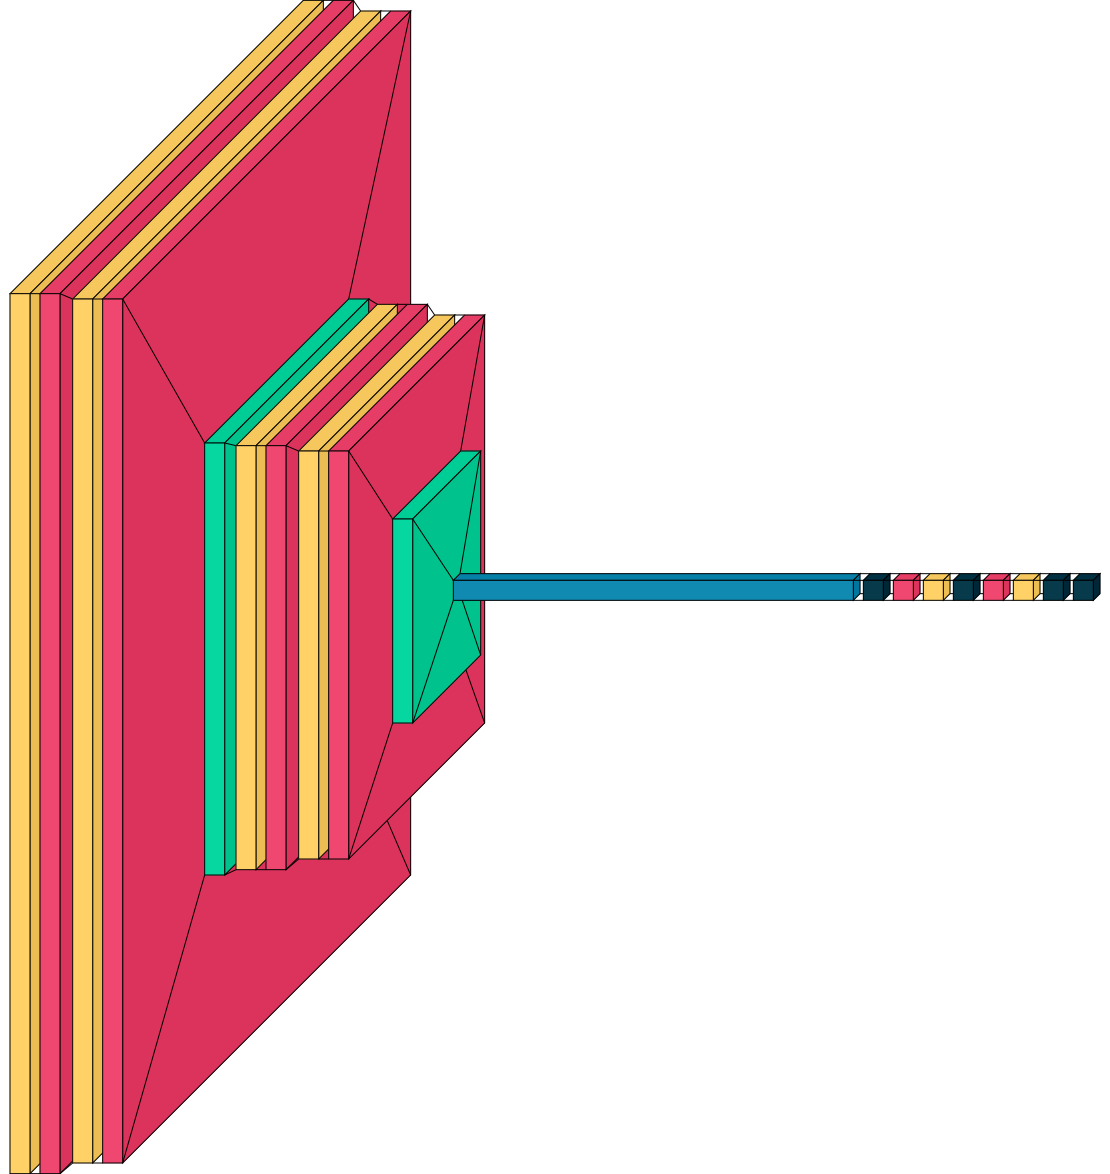

In [89]:
visualkeras.layered_view(My_model)

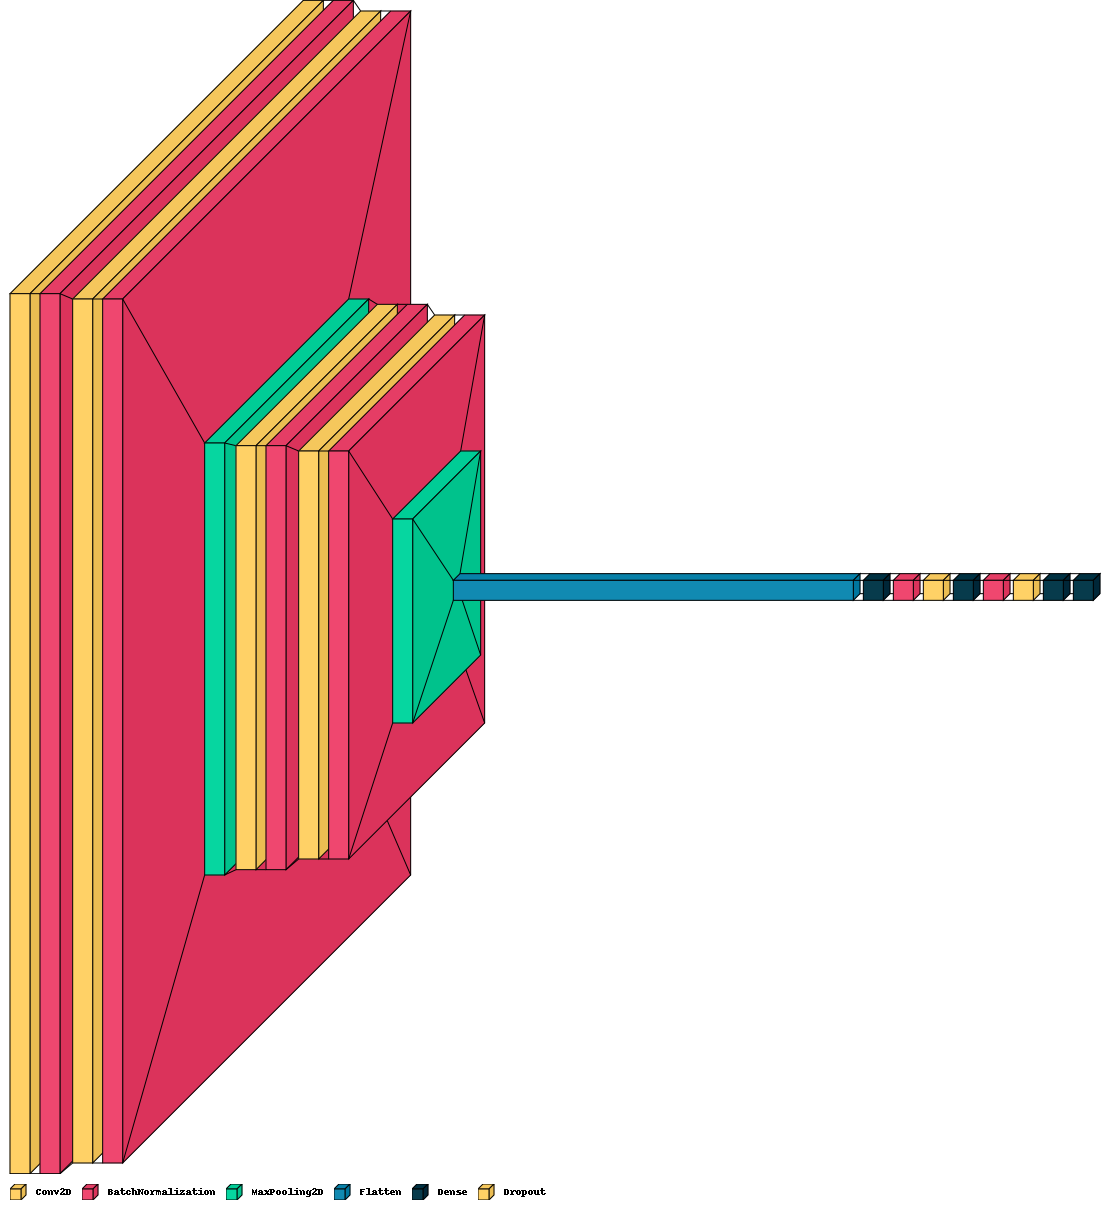

<Figure size 1000x1000 with 0 Axes>

In [111]:
from PIL import ImageFont
plt.figure(figsize = (10 , 10 ))
#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(My_model, legend=True)  # font is optional!

In [91]:
My_model.save("93.h5")

In [92]:
My_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 128)     9728      
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 55)      176055    
                                                                 
 batch_normalization_1 (Batc  (None, 216, 216, 55)     220       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 55)     0         
 )                                                               
                                                        

In [95]:
x_test[56].shape

(224, 224, 3)

In [101]:
t = []
t.append(x_test[0])
t = np.array(t)

My_model.predict(t)

1/1 [==============================] - 1s 739ms/step


array([[1.]], dtype=float32)

1/1 [==============================] - 0s 57ms/step
 
1/1 [==============================] - 0s 36ms/step
 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 36ms/step
 
1/1 [==============================] - 0s 46ms/step
 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 37ms/step
 
1/1 [==============================] - 0s 42ms/step
 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 34ms/step
 
1/1 [==============================] - 0s 34ms/step
 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 36ms/step
 
1/1 [==============================] - 0s 28ms/step
 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


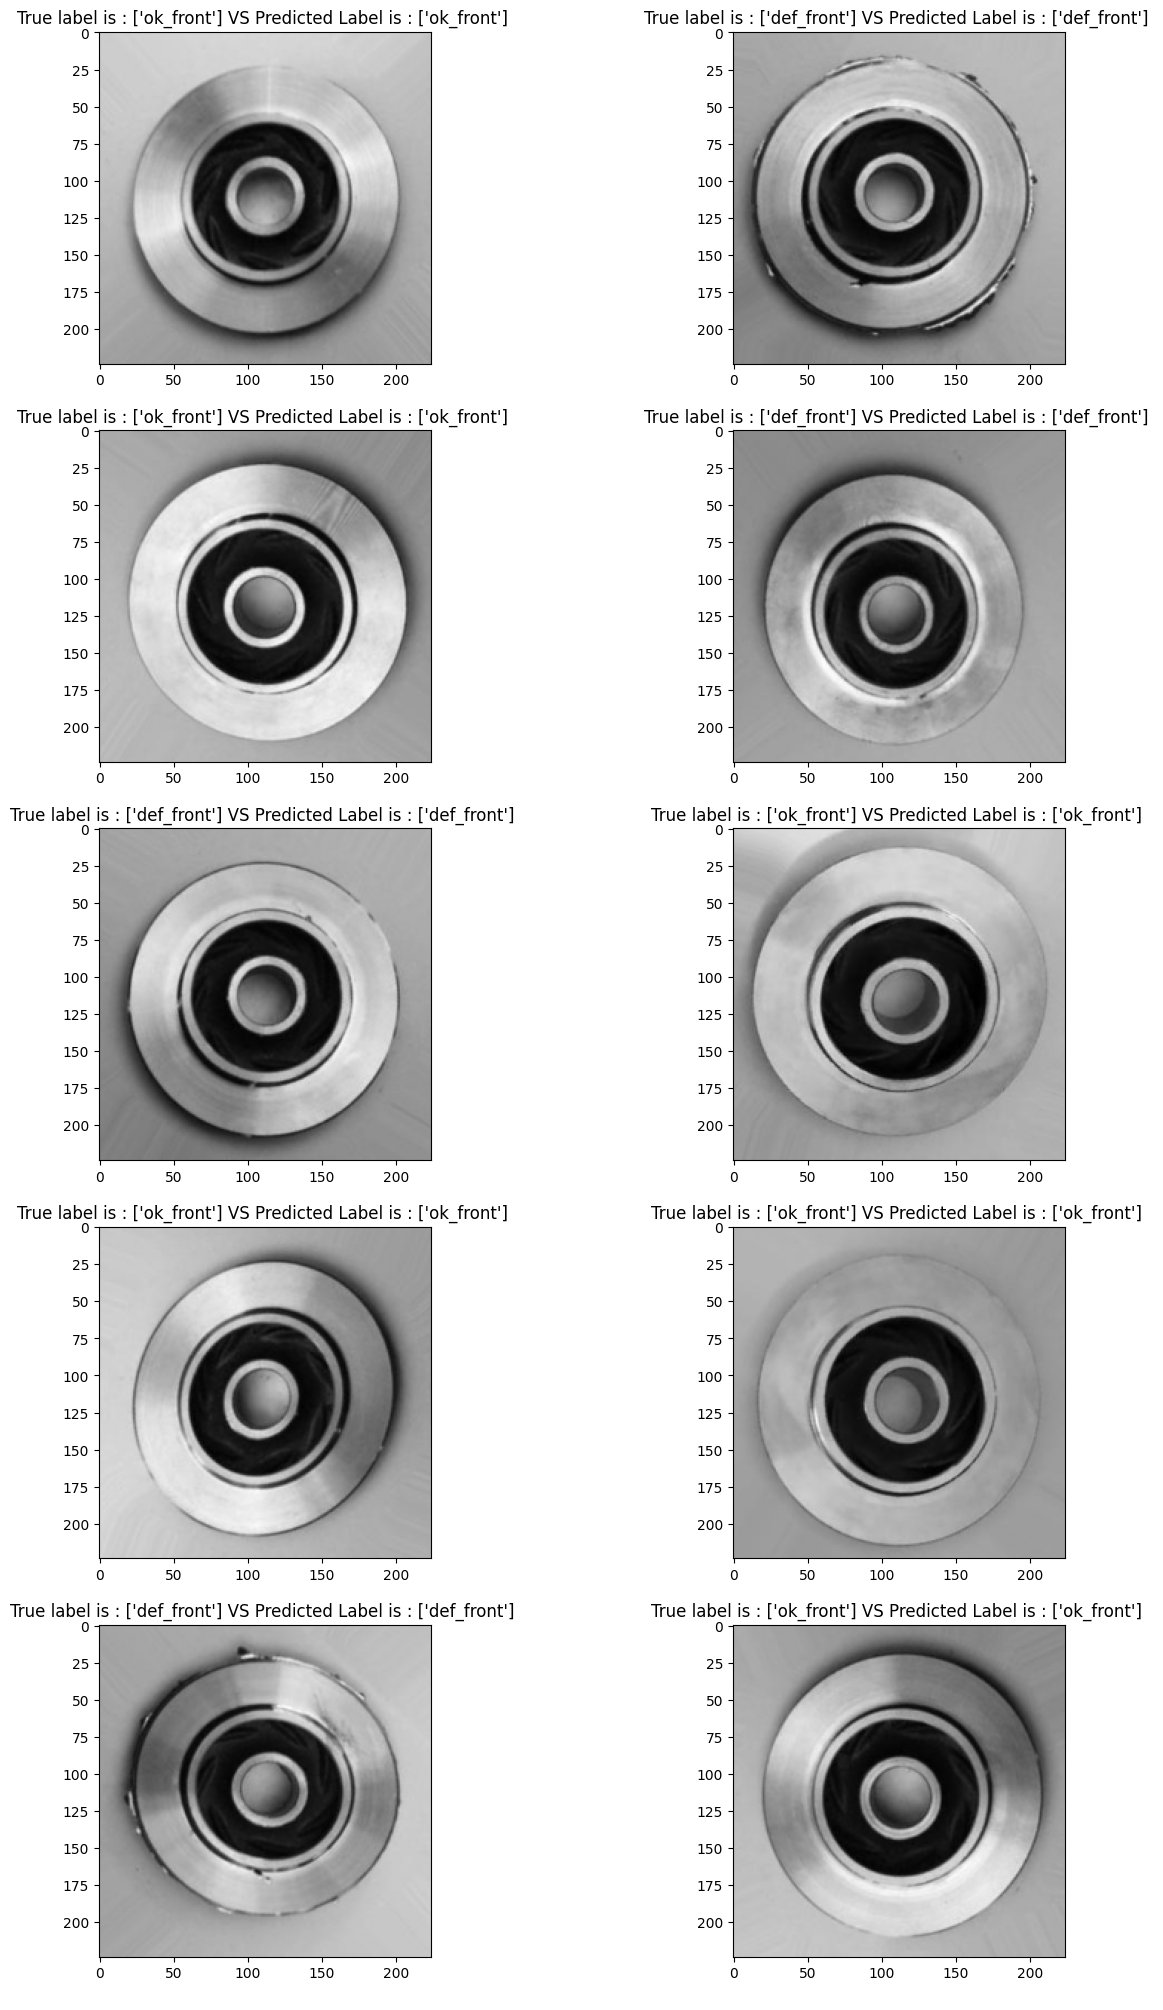

In [150]:
plt.figure(figsize = (15 , 25 ))
for index , value  in enumerate(np.random.randint(0 , 100 , 10 )) : 
  ax = plt.subplot(5 , 2 , index + 1 )
  t = []
  t.append(x_test[value])
  t = np.array(t)
  ax.imshow(t[0])
  predict = My_model.predict(t)
  if predict < 0.5 : 
    label = 0 

  else : 
    label = 1  
  True_label = obj_label_coder.inverse_transform([(y_test[value])])
  Predicted_label = obj_label_coder.inverse_transform([label])
  ax.set_title(f"True label is : {True_label} VS Predicted Label is : {Predicted_label} " ) 
  ax.set_xlabel(" ")
  print(" ")
  ax.set_ylabel(" ")


plt.show()

Would you like to see picture : [y/n] y
Would You like to see which picture 985
Label predict is :  ['def_front']
Label original  is :  ['def_front']


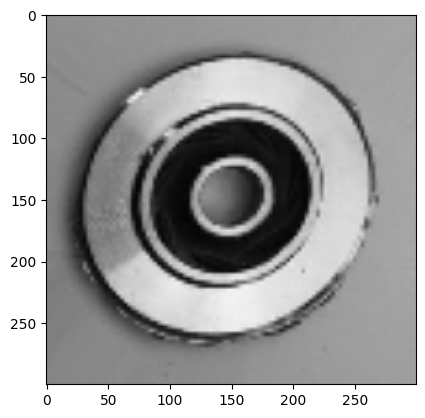

Would you like to see picture : [y/n] y
Would You like to see which picture 1265
Label predict is :  ['ok_front']
Label original  is :  ['ok_front']


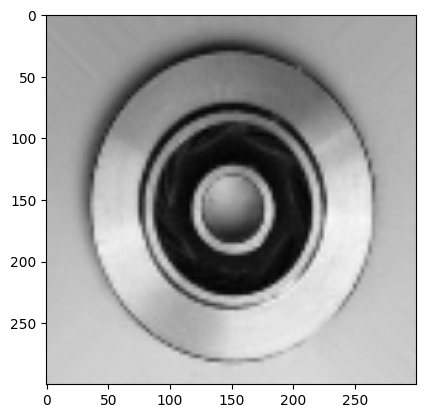

Would you like to see picture : [y/n] y
Would You like to see which picture 796
Label predict is :  ['def_front']
Label original  is :  ['def_front']


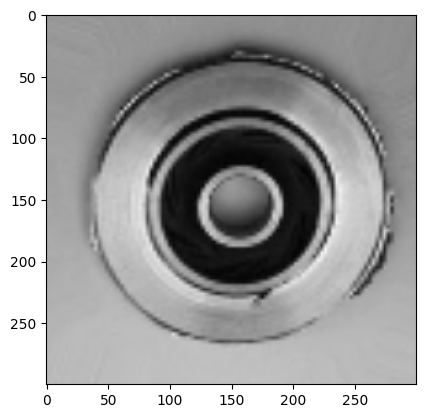

Would you like to see picture : [y/n] y
Would You like to see which picture 3269


IndexError: ignored

In [ ]:
while 1 : 
  response = input("Would you like to see picture : [y/n] " )
  if response == "y" : 
    vorodi = int(input("Would You like to see which picture "))
    plt.imshow(cv2.resize(x_test[vorodi] , (300 , 300 ) ))
    print("Label predict is : " , obj_label_coder.inverse_transform([result2[vorodi]]) )
    print("Label original  is : " , obj_label_coder.inverse_transform([np.argmax(y_test[vorodi])]) )

  else : 
    break 

  plt.show()

  time.sleep(3)